In [2]:
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\Valentin.Adam\AppData\Local\Temp\ipykernel_15472\526722019.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [7]:
# load dataset
series = read_csv('csv/82000278_Toamnei_CO2_2021_08_1week_v2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [8]:
series

time
1627862426    612
1627862486    610
1627862546    606
1627862606    609
1627862666    606
             ... 
1628466932    588
1628466992    589
1628467052    587
1628467112    587
1628467172    586
Name: co2, Length: 10070, dtype: int64

In [9]:
# grid search ARIMA parameters for time series


# evaluate an ARIMA model for a given order (p,d,q)

def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=75.865
ARIMA(0, 0, 1) RMSE=39.041


In [72]:
dataframe_size = len(series.index)
dataframe_size

36

In [73]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

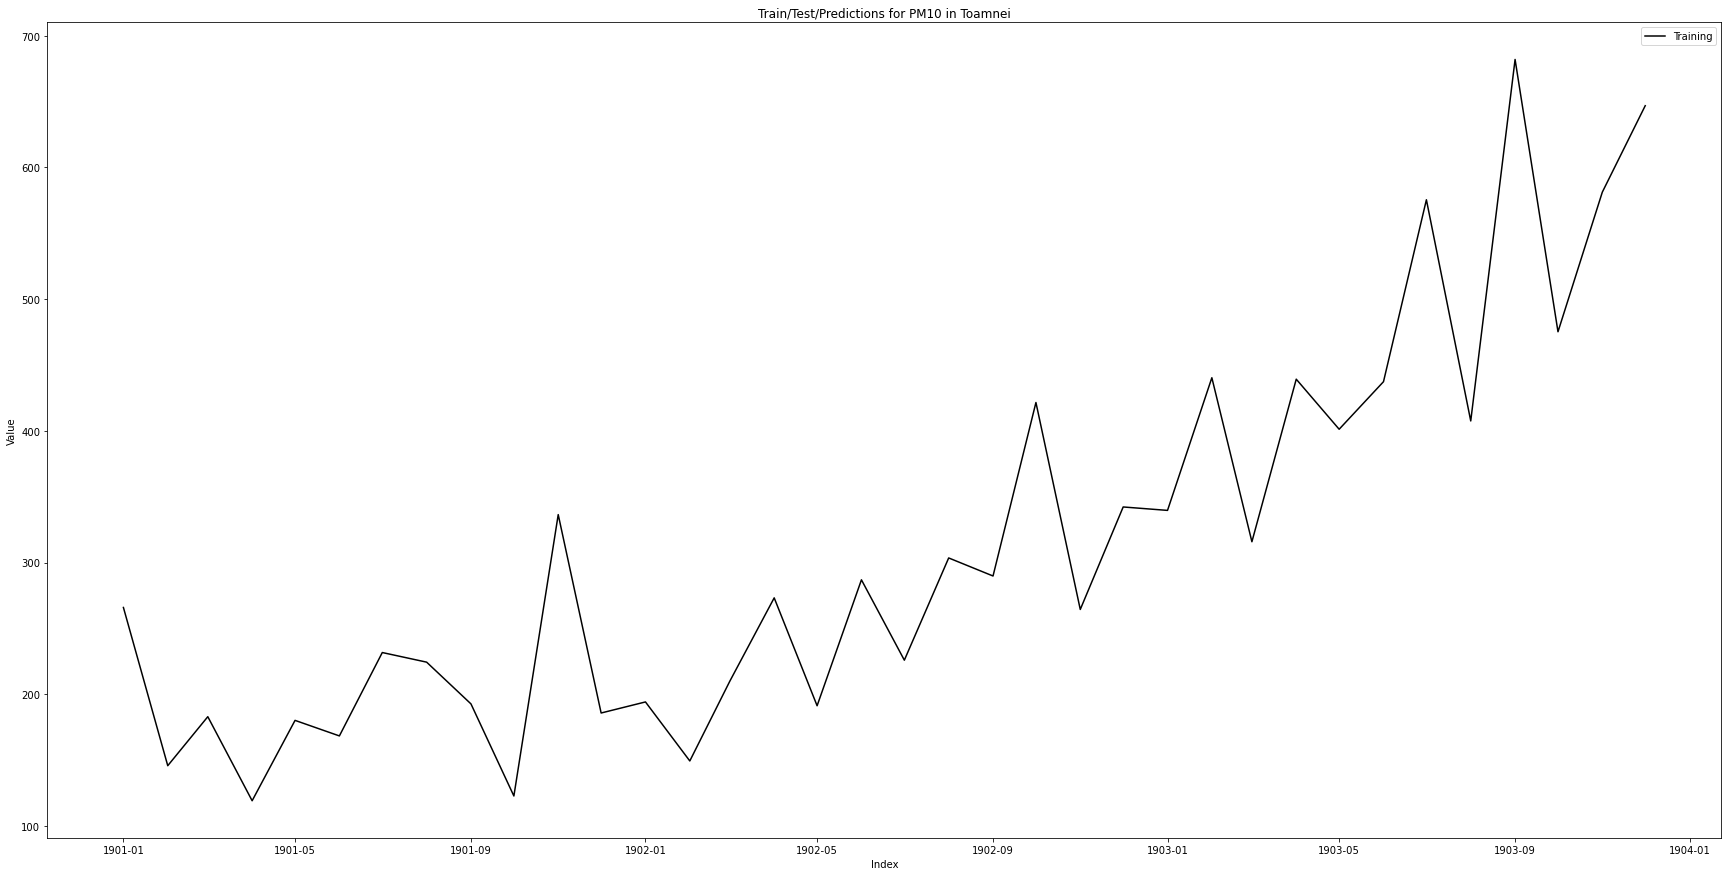

In [74]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(series, color = "black", label = "Training")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.legend()
plt.show()

In [75]:
import pandas as pd
df = pd.DataFrame(series)
df

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


In [76]:
df['new_col'] = range(1, len(df) + 1)
df

,Sales,new_col
Month,,
1901-01-01,266.0,1
1901-02-01,145.9,2
1901-03-01,183.1,3
1901-04-01,119.3,4
1901-05-01,180.3,5
1901-06-01,168.5,6
1901-07-01,231.8,7
1901-08-01,224.5,8
1901-09-01,192.8,9


In [77]:
df.set_index('new_col')

,Sales
new_col,
1,266.0
2,145.9
3,183.1
4,119.3
5,180.3
6,168.5
7,231.8
8,224.5
9,192.8


In [100]:
train = df[df.get('new_col') <  29]
test  = df[df.get('new_col') >= 29]

In [101]:
train.set_index('new_col')
test.set_index('new_col')

,Sales
new_col,
29,401.3
30,437.4
31,575.5
32,407.6
33,682.0
34,475.3
35,581.3
36,646.9


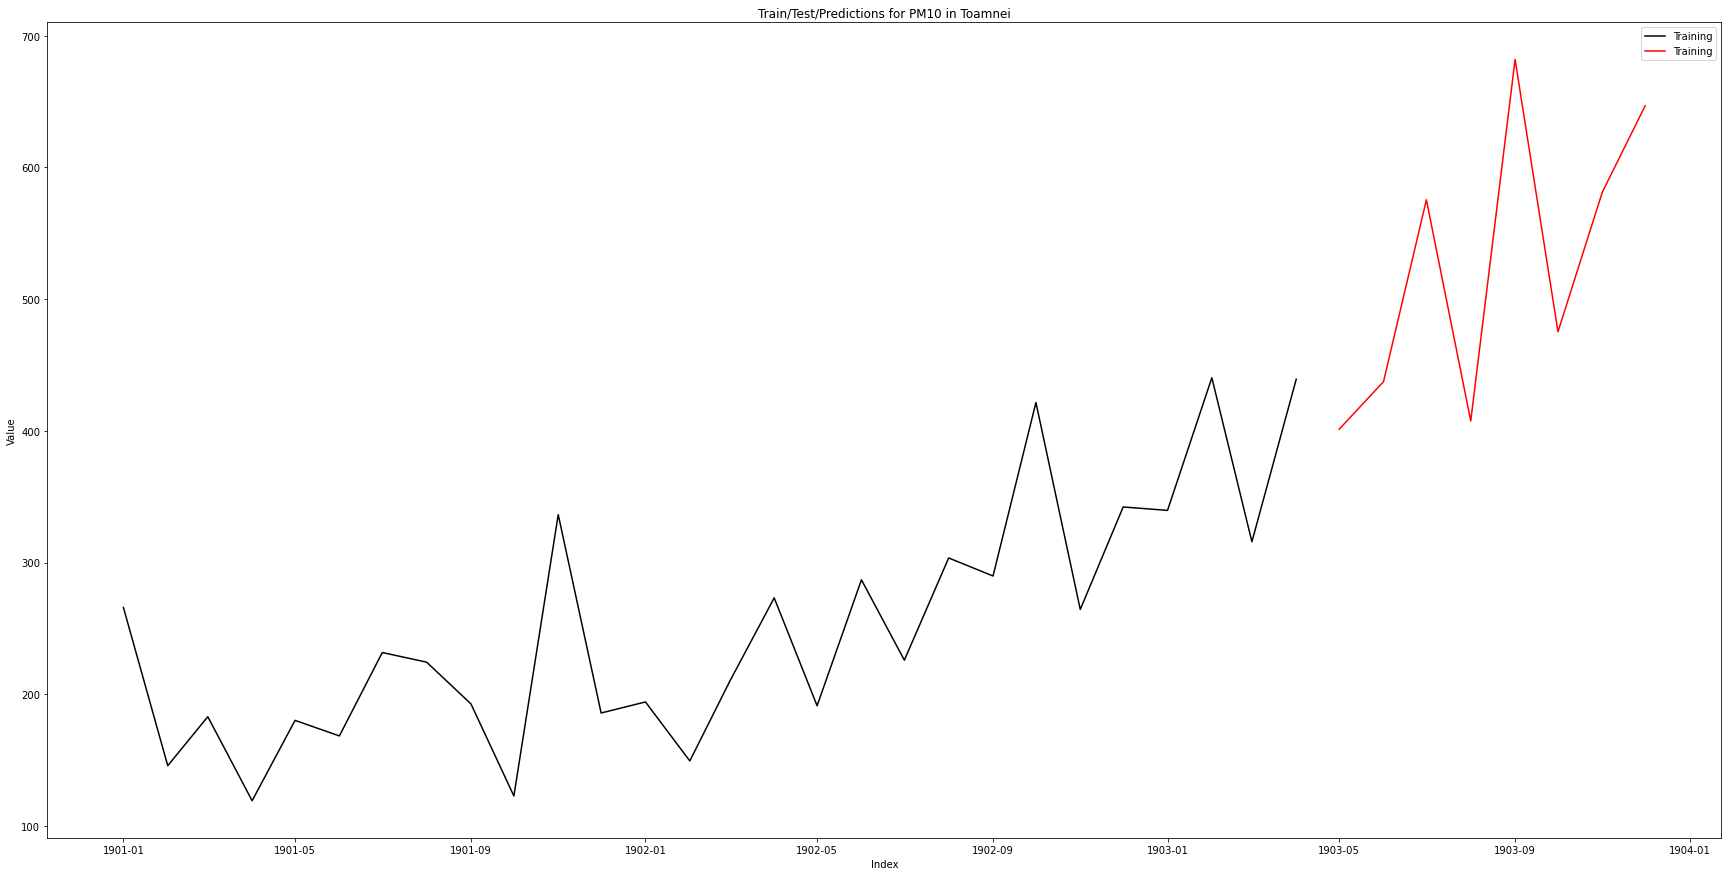

In [102]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('Sales'), color = "black", label = "Training")
plt.plot(test.index, test.get('Sales'), color = "red", label = "Training")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.legend()
plt.show()

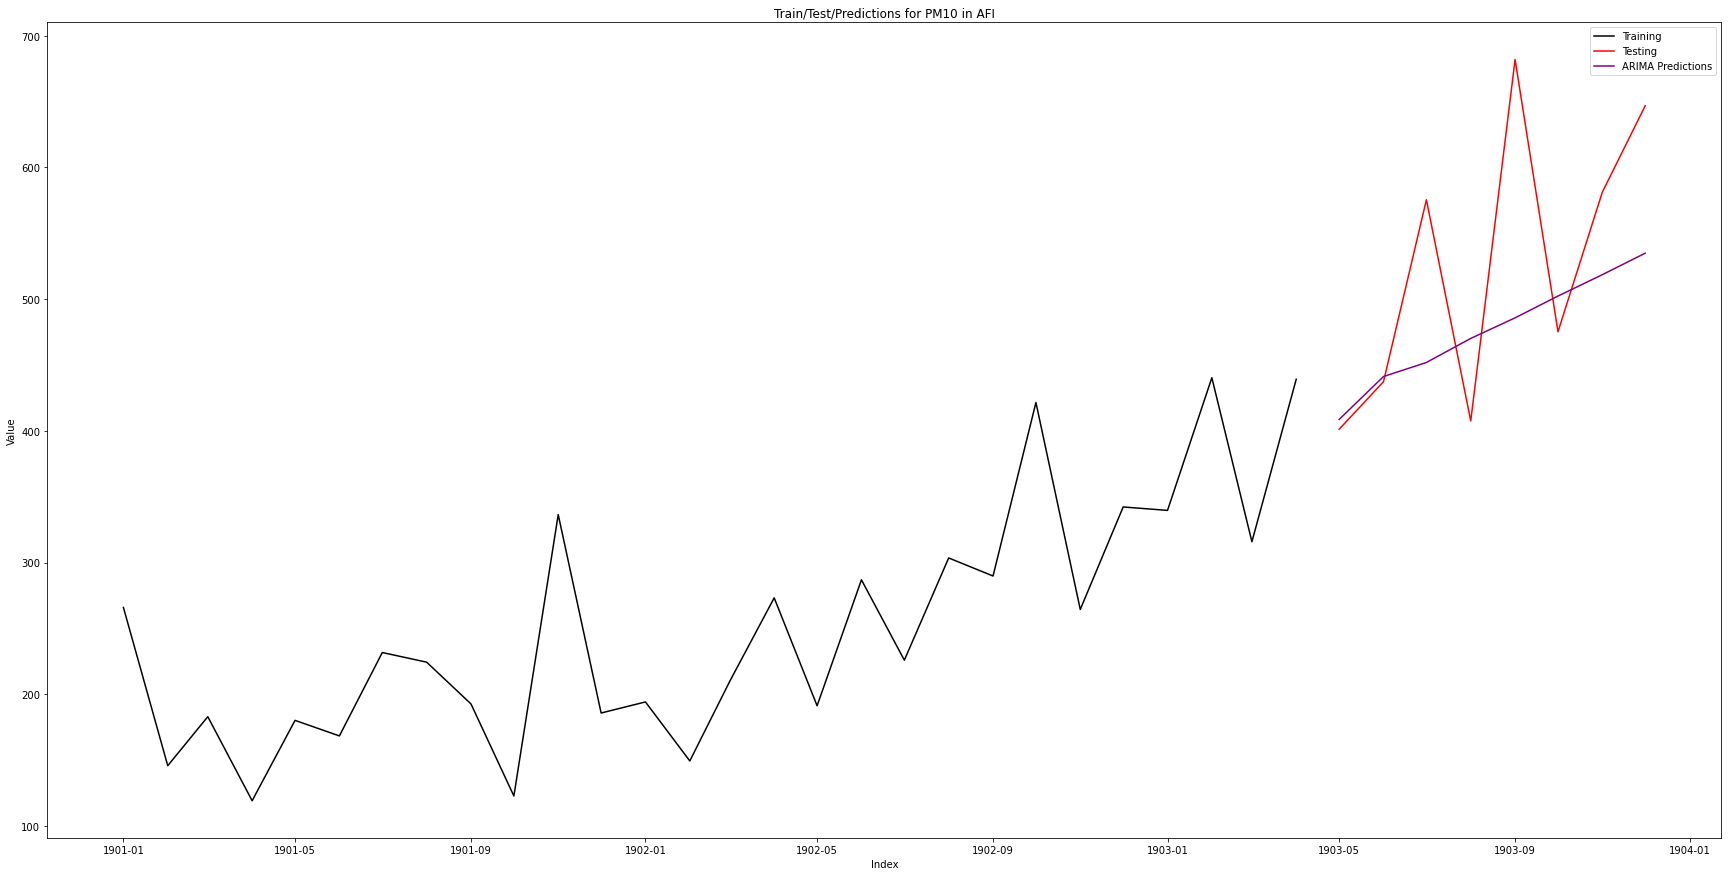

RMSE:  96.7711108040164


In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['Sales']

ARMAmodel = ARIMA(y, order=(1,2,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('Sales'), color = "black", label = "Training")
plt.plot(test.index, test.get('Sales'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in AFI")
plt.plot(y_pred_df.index, y_pred_df.get('Predictions'), color='purple', label = 'ARIMA Predictions')
plt.legend()
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(test["Sales"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)